In [2]:
# Menghubungkan Google Drive ke Google Colab untuk akses penyimpanan data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengubah direktori kerja ke folder di Google Drive
%cd /content/drive/MyDrive/Semester/Sem 5/Research Methodology in Computer Science/Kelompok 17

/content/drive/MyDrive/Semester/Sem 5/Research Methodology in Computer Science/Kelompok 17


In [40]:
# Mengimpor library yang diperlukan
import warnings  # Library untuk mengatur dan menyaring peringatan
import numpy as np  # Library untuk operasi numerik pada array
import pandas as pd  # Library untuk manipulasi dan analisis data
import seaborn as sns  # Library untuk visualisasi data berbasis matplotlib
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi data
from scipy import stats  # Library untuk analisis statistik
from math import sqrt # Library untuk menghitung akar kuadrat

# Menonaktifkan peringatan agar tidak mengganggu output
warnings.filterwarnings('ignore')

In [5]:
# Mengimpor modul 'files' dari 'google.colab' untuk mengupload file
from google.colab import files

# Memanggil fungsi 'upload' untuk mengupload file dari komputer pengguna
uploaded = files.upload()

Saving StudentPerformance.csv to StudentPerformance (4).csv


# Exploratory Data Analysis

In [6]:
# Membaca dataset
df = pd.read_csv("StudentPerformance.csv")

In [7]:
# Menampilkan beberapa baris pertama
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# Menampilkan jumlah baris dan kolom dalam dataset
df.shape

(395, 33)

In [9]:
# Menampilkan informasi ringkas tentang dataset
# Termasuk jumlah entri, jumlah kolom, nama kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
# Menghitung jumlah nilai yang hilang (null) pada setiap kolom dalam DataFrame
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [11]:
# Mengecek jumlah data duplikat dalam dataframe
df.duplicated().value_counts()

,count
False,395


In [12]:
# Menghitung jumlah nilai unik yang ada di setiap kolom dalam DataFrame
df.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [13]:
# Menampilkan statistik deskriptif dari DataFrame untuk kolom numerik
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Text(50.722222222222214, 0.5, 'Jumlah Kegagalan')

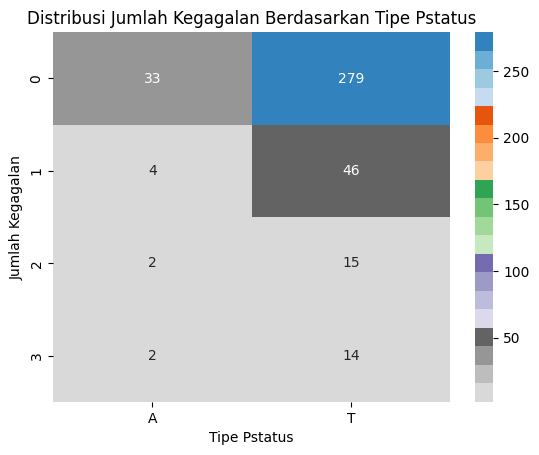

In [14]:
# Membuat pivot table untuk menghitung jumlah kemunculan 'failures' untuk setiap tipe 'Pstatus'
pivot_table = df.pivot_table(index='failures', columns='Pstatus', aggfunc='size')

# Membuat heatmap menggunakan seaborn, dengan anotasi, skema warna, dan format angka untuk anotasi
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

# Menambahkan judul pada plot
plt.title('Distribusi Jumlah Kegagalan Berdasarkan Tipe Pstatus')

# Menambahkan label pada sumbu x
plt.xlabel('Tipe Pstatus')

# Menambahkan label pada sumbu y
plt.ylabel('Jumlah Kegagalan')

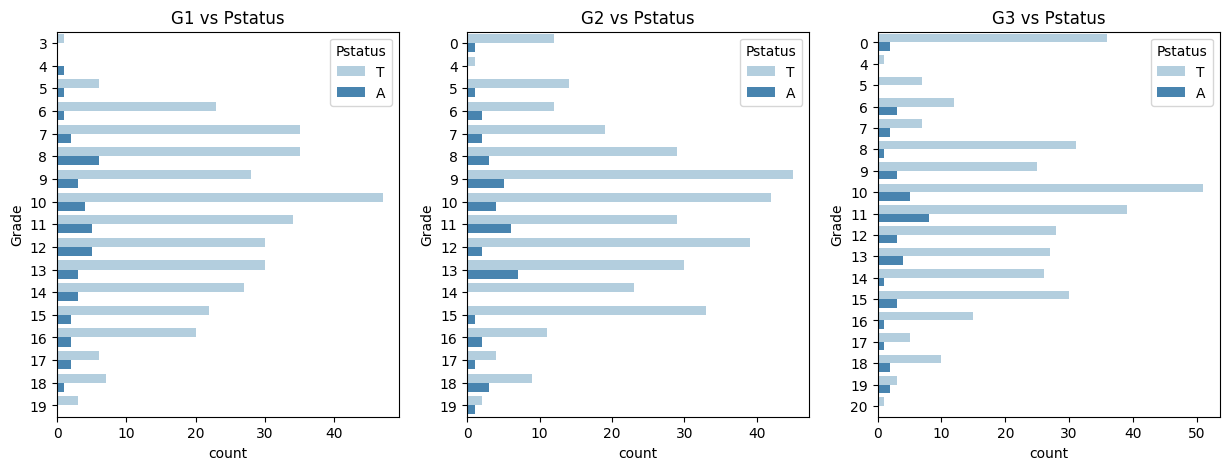

In [15]:
# Membuat subplot dengan 1 baris dan 3 kolom, dengan setiap plot berbagi sumbu y
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Melakukan iterasi melalui periode nilai (G1, G2, G3) dan membuat plot
for i, grade_period in enumerate(['G1', 'G2', 'G3']):  # Melakukan loop untuk setiap kolom nilai
    sns.countplot(ax=axes[i], data=df, y=grade_period, hue="Pstatus", palette="Blues")
    # Membuat countplot untuk masing-masing periode nilai, dengan hue 'Pstatus' dan skema warna biru

    axes[i].set_title(f'{grade_period} vs Pstatus')  # Menambahkan judul pada setiap plot
    axes[i].set_ylabel("Grade")  # Menambahkan label untuk sumbu y pada setiap plot

# Menampilkan semua plot
plt.show()

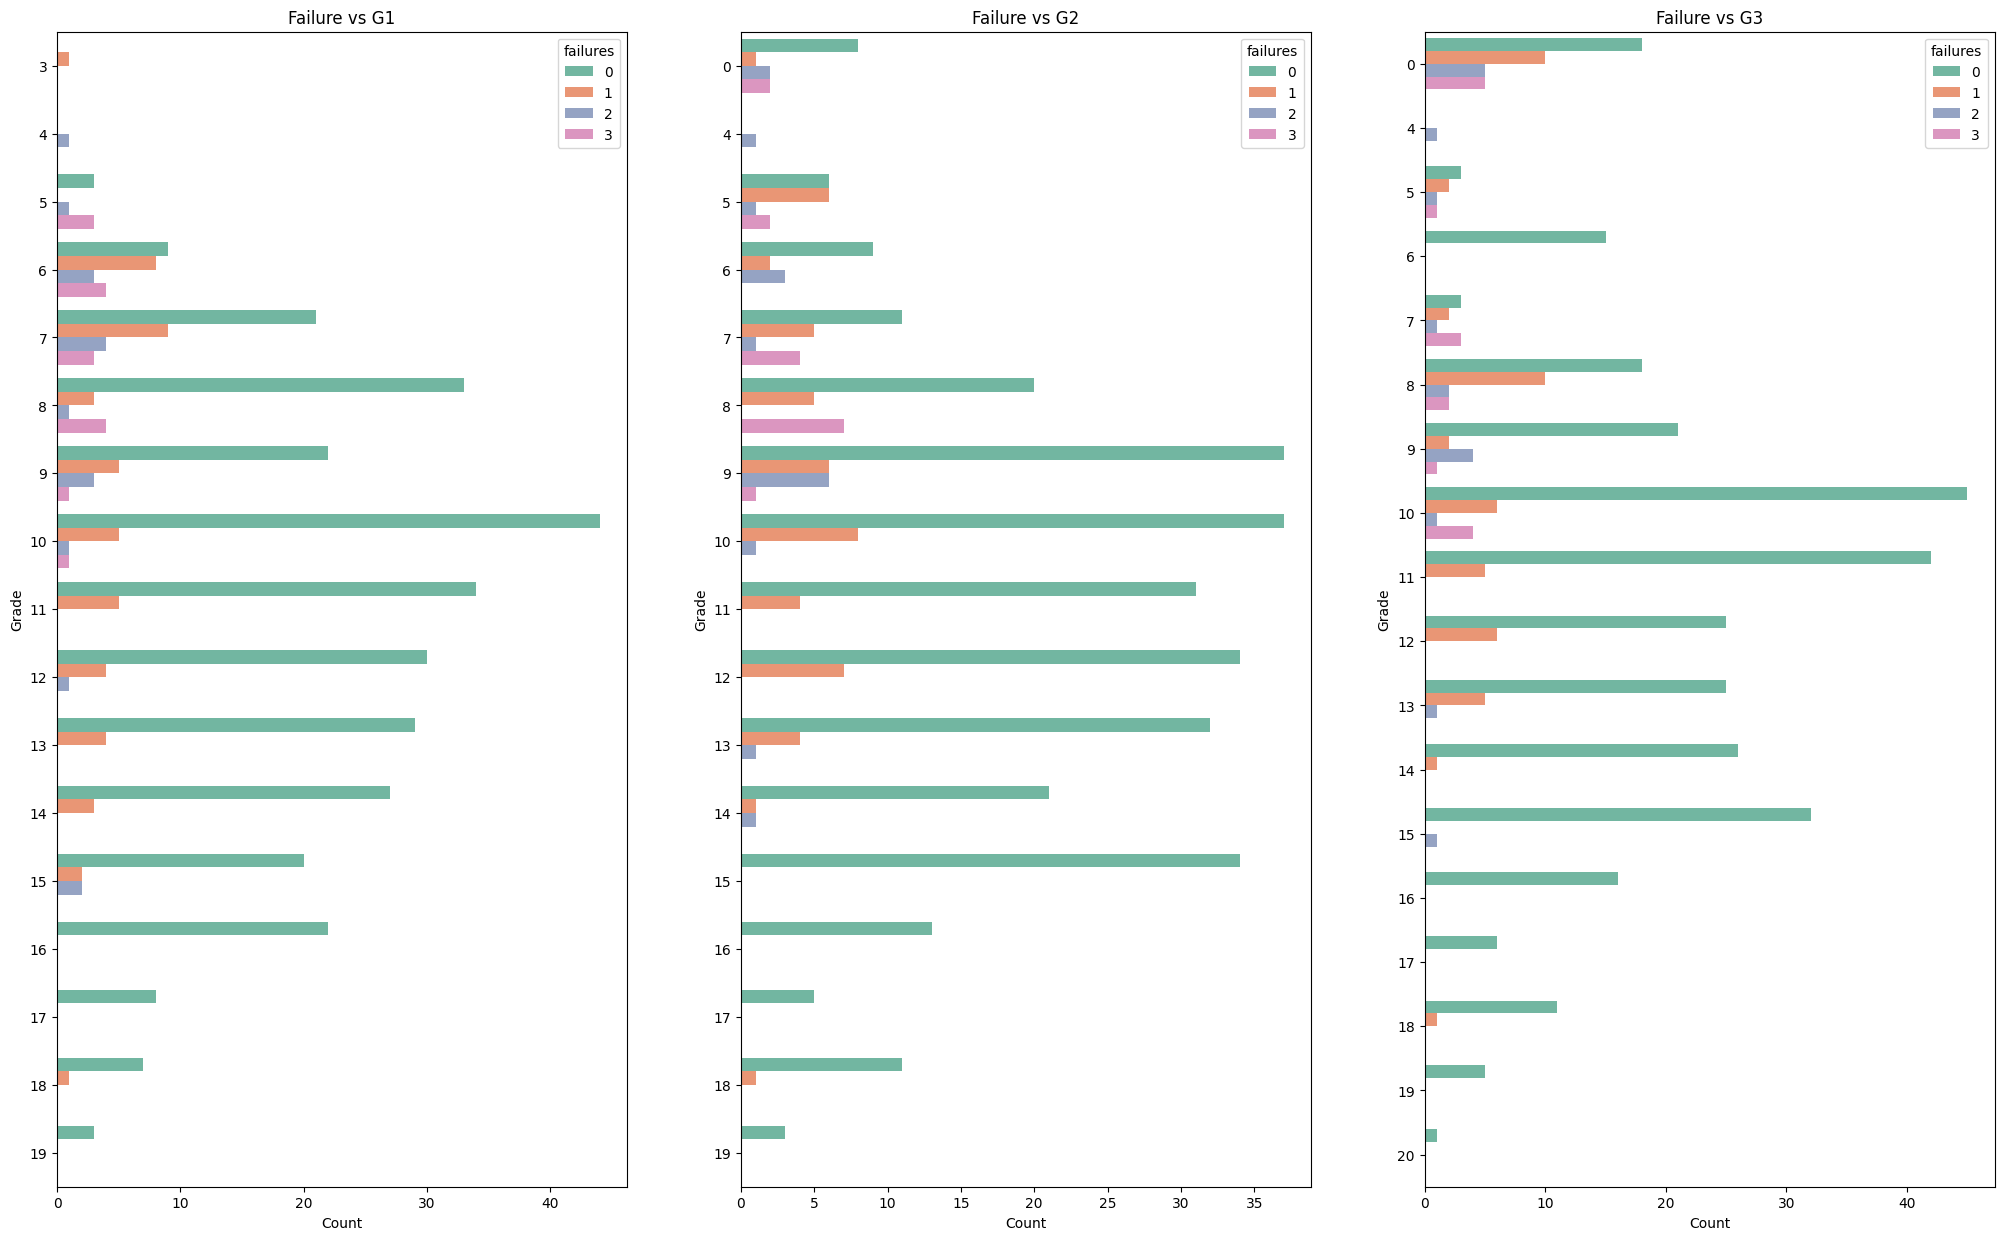

In [16]:
# Membuat subplot dengan 1 baris dan 3 kolom, serta menyesuaikan ukuran figure
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Melakukan iterasi melalui periode nilai (G1, G2, G3) dan membuat plot
for i, grade in enumerate(['G1', 'G2', 'G3']):  # Melakukan loop untuk setiap kolom nilai
    sns.countplot(data=df, y=grade, hue='failures', ax=axes[i], palette='Set2', dodge=True)
    # Membuat countplot untuk masing-masing periode nilai (G1, G2, G3)
    # dengan hue berdasarkan 'failures' dan skema warna 'Set2'

    axes[i].set_title(f'Failure vs {grade}')  # Menambahkan judul pada setiap subplot
    axes[i].set_ylabel('Grade')  # Menambahkan label untuk sumbu y
    axes[i].set_xlabel('Count')  # Menambahkan label untuk sumbu x

# Menampilkan semua plot
plt.show()

In [17]:
# Melakukan iterasi untuk setiap kolom dalam DataFrame
for column in df.columns:
    # Menampilkan nama kolom
    print(column)
    # Menampilkan jumlah kemunculan nilai unik pada kolom tersebut
    print(df[column].value_counts())
    # Menambahkan pemisah antar kolom untuk kejelasan
    print('----------------------------------')

school
school
GP    349
MS     46
Name: count, dtype: int64
----------------------------------
sex
sex
F    208
M    187
Name: count, dtype: int64
----------------------------------
age
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
----------------------------------
address
address
U    307
R     88
Name: count, dtype: int64
----------------------------------
famsize
famsize
GT3    281
LE3    114
Name: count, dtype: int64
----------------------------------
Pstatus
Pstatus
T    354
A     41
Name: count, dtype: int64
----------------------------------
Medu
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
----------------------------------
Fedu
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
----------------------------------
Mjob
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
--------------------------------

# Data Pre-Processing

In [18]:
# Mengimpor library yang diperlukan
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder untuk melakukan encoding data kategorikal
label_encoder = LabelEncoder()

# Daftar kolom yang akan di-encode
Columns = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian",
           "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Melakukan iterasi untuk setiap kolom dalam daftar Columns
for i in range(len(Columns)):
    # Mengambil nilai unik dari kolom yang sedang diproses
    Country_keys = df[Columns[i]]  # Mengambil data kolom
    Country_keys = Country_keys.tolist()  # Mengonversi data kolom menjadi list

    # Melakukan label encoding untuk data kolom yang sedang diproses
    Country_values = label_encoder.fit_transform(df[Columns[i]])  # Encode data kolom
    Country_values = Country_values.tolist()  # Mengonversi hasil encoding menjadi list

    # Memperbarui DataFrame dengan nilai hasil encoding
    df[Columns[i]] = label_encoder.fit_transform(df[Columns[i]])  # Update kolom dengan nilai encoded

    # Membuat dictionary yang memetakan nilai asli ke nilai encoded
    Country_dict = dict(zip(Country_keys, Country_values))

    # Menampilkan dictionary yang berisi mapping nilai asli ke nilai encoded
    print(Country_dict)

{'GP': 0, 'MS': 1}
{'F': 0, 'M': 1}
{'U': 1, 'R': 0}
{'GT3': 0, 'LE3': 1}
{'A': 0, 'T': 1}
{'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
{'teacher': 4, 'other': 2, 'services': 3, 'health': 1, 'at_home': 0}
{'course': 0, 'other': 2, 'home': 1, 'reputation': 3}
{'mother': 1, 'father': 0, 'other': 2}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'yes': 1, 'no': 0}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}


Text(0.5, 1.0, 'Correlation Heatmap')

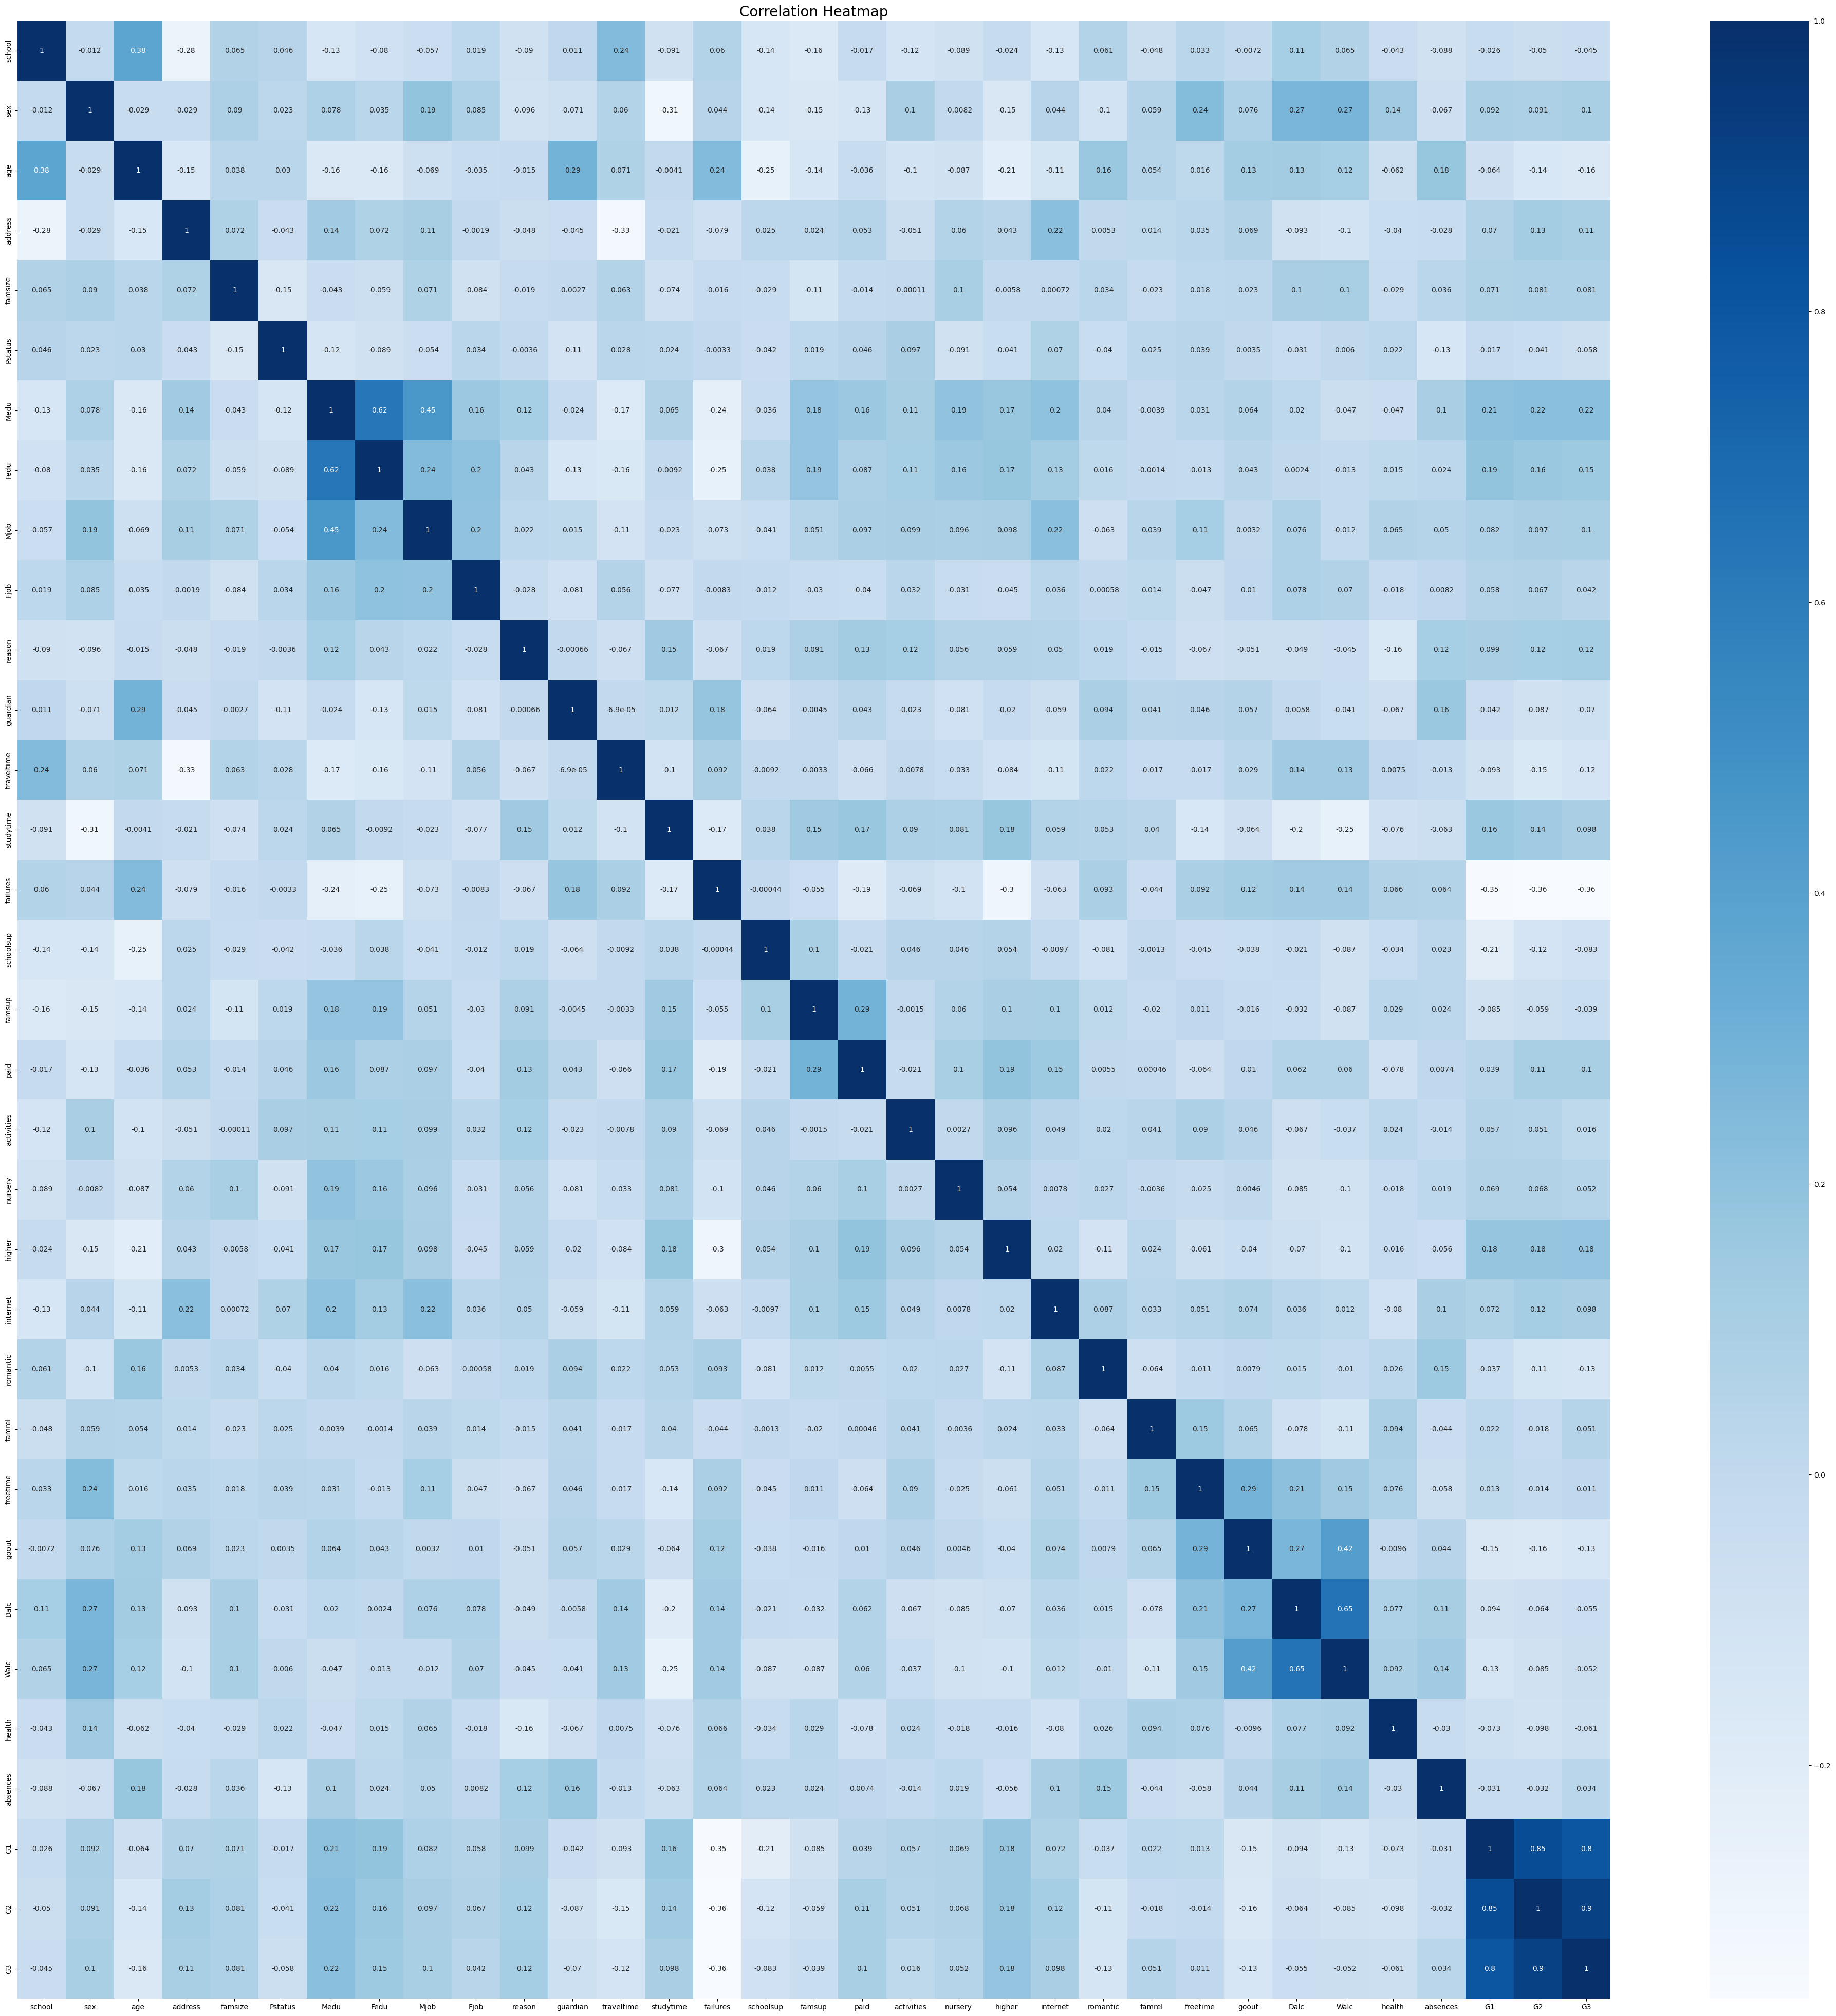

In [19]:
# Menghitung matriks korelasi untuk DataFrame
corr = df.corr()

# Membuat figure dengan ukuran besar untuk visualisasi yang lebih jelas
plt.figure(figsize=(50, 50))

# Membuat heatmap menggunakan seaborn, dengan anotasi dan skema warna biru
sns.heatmap(corr, annot=True, cmap="Blues")

# Menambahkan judul pada heatmap dengan ukuran font lebih besar
plt.title('Correlation Heatmap', fontsize=20)

In [20]:
# Menghitung nilai z-score absolut untuk setiap elemen dalam DataFrame hanya untuk kolom numerik
df_numeric = df.select_dtypes(include=[np.number])  # Memilih hanya kolom numerik
z_scores = np.abs(stats.zscore(df_numeric))  # Menghitung z-score untuk kolom numerik

# Menghitung bentuk (jumlah baris dan kolom) dari DataFrame setelah dihitung z-score
z_scores.shape  # Menampilkan jumlah baris dan kolom dari hasil z-score

# Menyaring DataFrame dengan menghapus outlier (nilai dengan z-score >= 3) pada semua kolom numerik
df_filtered = df[(z_scores < 3).all(axis=1)]  # Menyaring baris yang memiliki z-score >= 3 pada semua kolom numerik

# Menampilkan DataFrame setelah penyaringan untuk memeriksa hasilnya
df_filtered

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,0,7,9,8
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


## Menghilang Outliers pada Kolom Numerik yang Bukan Merupakan Angka Rating atau Jumlah

In [21]:
# Menentukan nama kolom yang ingin dianalisis
column = 'absences'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
q1 = np.percentile(df[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas
df_numeric_clean = df_numeric[(df_numeric[column] >= batas_bawah) & (df_numeric[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_numeric_clean.shape

-12.0
20.0


(380, 33)

In [22]:
# Menentukan nama kolom yang ingin dianalisis
column = 'age'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'age'
q1 = np.percentile(df_numeric_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_numeric_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'age'
df_numeric_clean = df_numeric_clean[(df_numeric_clean[column] >= batas_bawah) & (df_numeric_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_numeric_clean.shape

13.0
21.0


(379, 33)

In [23]:
# Menentukan nama kolom yang ingin dianalisis
column = 'G1'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'G1'
q1 = np.percentile(df_numeric_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_numeric_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'G1'
df_numeric_clean = df_numeric_clean[(df_numeric_clean[column] >= batas_bawah) & (df_numeric_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_numeric_clean.shape

0.5
20.5


(379, 33)

In [24]:
# Menentukan nama kolom yang ingin dianalisis
column = 'G2'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'G2'
q1 = np.percentile(df_numeric_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_numeric_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'G2'
df_numeric_clean = df_numeric_clean[(df_numeric_clean[column] >= batas_bawah) & (df_numeric_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_numeric_clean.shape

3.0
19.0


(366, 33)

In [25]:
# Menentukan nama kolom yang ingin dianalisis
column = 'G3'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom 'G3'
q1 = np.percentile(df_numeric_clean[column], 25)  # Kuartil pertama (25th percentile)
q3 = np.percentile(df_numeric_clean[column], 75)  # Kuartil ketiga (75th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1  # Rentang antara Q1 dan Q3

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
batas_bawah = q1 - (1.5 * IQR)  # Batas bawah untuk outlier
batas_atas = q3 + (1.5 * IQR)   # Batas atas untuk outlier

# Mencetak batas bawah dan batas atas
print(batas_bawah)
print(batas_atas)

# Menghapus data yang dianggap sebagai outlier berdasarkan batas bawah dan batas atas untuk kolom 'G3'
df_numeric_clean = df_numeric_clean[(df_numeric_clean[column] >= batas_bawah) & (df_numeric_clean[column] <= batas_atas)]

# Menampilkan jumlah baris dan kolom setelah menghapus outlier
df_numeric_clean.shape

1.5
21.5


(341, 33)

# Feature Selection

Kami akan menerapkan metode pemilihan fitur yang dapat membantu kami untuk memilih fitur yang efektif dalam model daripada memilih semua fitur yang efektif dan fitur yang tidak efektif

In [26]:
# Menghapus kolom 'G3' dari DataFrame df dan menyimpan sisanya di variabel x (fitur)
x = df.drop('G3', axis = 1)
# Menyimpan kolom 'G3' dari DataFrame df ke dalam variabel y (target)
y = df['G3']

In [27]:
# Mengambil nama-nama kolom dari DataFrame x (fitur) dan menyimpannya di variabel all_features
all_features = x.columns
# Menampilkan daftar nama kolom yang ada pada DataFrame x
all_features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [28]:
# Library untuk membangun model pohon keputusan
from sklearn.tree import DecisionTreeClassifier

# Library untuk memilih fitur yang paling penting berdasarkan model
from sklearn.feature_selection import SelectFromModel

In [29]:
# Mengambil objek dari pustaka untuk menggunakan model pohon keputusan
# Menggunakan kriteria 'entropy' untuk mendefinisikan pentingnya fitur
dtc = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')

In [30]:
# Membuat objek selector untuk memilih fitur yang penting berdasarkan model pohon keputusan yang telah dibuat
selector = SelectFromModel(estimator = dtc)

In [31]:
# Mengonversi kolom yang berisi data kategori (seperti 'GP') menjadi numerik
label_encoder = LabelEncoder()

# Menyaring kolom-kolom kategori dan mengonversinya
for column in x.select_dtypes(include=['object']).columns:
    x[column] = label_encoder.fit_transform(x[column])

# Melatih selector dengan data fitur (x) dan target (y) untuk memilih fitur yang penting berdasarkan model pohon keputusan
selector.fit(x, y)

SelectFromModel(estimator=DecisionTreeClassifier(criterion='entropy',
                                                 random_state=0))

In [32]:
# Mengambil indeks fitur yang dipilih oleh model berdasarkan pentingnya fitur
selector.get_support(indices=True)

array([24, 28, 29, 30, 31])

In [33]:
# Menyimpan indeks fitur yang dipilih oleh model dalam variabel selected_features_idx
selected_features_idx = selector.get_support(indices=True)

# Menampilkan indeks fitur yang dipilih berdasarkan hasil seleksi
selected_features_idx

array([24, 28, 29, 30, 31])

In [34]:
# Mengambil nama-nama fitur yang dipilih berdasarkan indeks yang sudah diseleksi dan menyimpannya dalam variabel selected_features
selected_features = all_features[selected_features_idx]

# Menampilkan nama-nama fitur yang dipilih
selected_features

Index(['freetime', 'health', 'absences', 'G1', 'G2'], dtype='object')

In [35]:
# Mendefinisikan daftar fitur yang akan digunakan dalam model atau analisis
feat = ['freetime', 'health', 'absences', 'G1', 'G2']

# Model Training and Evaluation
##Random Forest Regression Model

In [41]:
# Mengimpor pustaka yang diperlukan untuk pembagian data, regresi, dan metrik evaluasi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Memisahkan fitur dan variabel target
features = df[feat]  # Fitur
target = df['G3']  # Variabel target

# Membagi data menjadi set pelatihan dan pengujian dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Menginisialisasi model Random Forest Regression dengan parameter yang ditentukan
RFR = RandomForestRegressor(random_state=100, criterion='squared_error', max_depth=30, min_samples_leaf=5, n_jobs=1)

# Melatih model regresi dengan data pelatihan
RFR.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = RFR.predict(X_test)

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE (Root Mean Squared Error) dengan akar kuadrat dari MSE
rmse = sqrt(mse)

# Menghitung R^2 (R-squared) untuk mengukur sejauh mana variabilitas target dapat dijelaskan oleh model
r2 = r2_score(y_test, y_pred)

# Menghitung MAE (Mean Absolute Error) untuk mengetahui rata-rata selisih absolut antara nilai prediksi dan nilai asli
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MAPE (Mean Absolute Percentage Error) untuk mengetahui rata-rata persentase kesalahan absolut
mape = 100 * (mae / y_test.mean())

# Menampilkan hasil evaluasi model
print("RFR Mean Squared Error MSE:", mse)
print("RFR Root Mean Squared Error RMSE:", rmse)
print("RFR R^2 Score:", r2)
print("RFR Mean Absolute Error MAE:", mae)
print("RFR Mean Absolute Percentage Error MAPE:", mape)


RFR Mean Squared Error MSE: 3.3890237617323975
RFR Root Mean Squared Error RMSE: 1.840930134940595
RFR R^2 Score: 0.8347224604056208
RFR Mean Absolute Error MAE: 1.1411203499207698
RFR Mean Absolute Percentage Error MAPE: 10.593244141450155


##Decision Tree Regression Model

In [43]:
# Mengimpor pustaka yang dibutuhkan untuk membagi data, regresi pohon keputusan, dan menghitung metrik evaluasi
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan data uji
from sklearn.tree import DecisionTreeRegressor  # Untuk membuat model regresi pohon keputusan
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Untuk menghitung MSE, RMSE, R^2, dan MAE

# Memisahkan fitur dan variabel target
features = df[feat]  # Fitur yang digunakan untuk prediksi
target = df['G3']  # Variabel target yang akan diprediksi

# Membagi data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi model regresi pohon keputusan dengan parameter yang ditentukan
DTR = DecisionTreeRegressor(random_state=100, criterion='squared_error', max_depth=30, min_samples_leaf=5)

# Melatih model regresi pohon keputusan dengan data latih
DTR.fit(X_train, y_train)

# Memprediksi nilai target menggunakan data uji
y_pred = DTR.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Menghitung R^2 Score untuk mengevaluasi akurasi prediksi
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Menghitung persentase error rata-rata

# Menampilkan hasil evaluasi model
print("DTR Mean Squared Error MSE:", mse)
print("DTR Root Mean Squared Error RMSE:", rmse)
print("DTR R^2 Score:", r2)
print("DTR Mean Absolute Error MAE:", mae)
print("DTR Mean Absolute Percentage Error MAPE:", mape)

DTR Mean Squared Error MSE: 4.477269052721886
DTR Root Mean Squared Error RMSE: 2.115955824851239
DTR R^2 Score: 0.7816503910383733
DTR Mean Absolute Error MAE: 1.3237793851717905
DTR Mean Absolute Percentage Error MAPE: inf


##Linear Regression Model

In [44]:
# Mengimpor pustaka yang dibutuhkan untuk membagi data, regresi linier, dan menghitung metrik evaluasi
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan data uji
from sklearn.linear_model import LinearRegression  # Untuk membuat model regresi linier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Untuk menghitung MSE, RMSE, R^2, MAE

# Memisahkan fitur dan variabel target
features = df[feat]  # Fitur yang digunakan untuk prediksi
target = df['G3']  # Variabel target yang akan diprediksi

# Membagi data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier dengan parameter yang ditentukan
LR = LinearRegression(fit_intercept=True, n_jobs=1)

# Melatih model regresi linier dengan data latih
LR.fit(X_train, y_train)

# Memprediksi nilai target menggunakan data uji
y_pred = LR.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Menghitung R^2 Score untuk mengevaluasi akurasi prediksi
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Menghitung persentase error rata-rata

# Menampilkan hasil evaluasi model
print("LR Mean Squared Error MSE:", mse)
print("LR Root Mean Squared Error RMSE:", rmse)
print("LR R^2 Score:", r2)
print("LR Mean Absolute Error MAE:", mae)
print("LR Mean Absolute Percentage Error MAPE:", mape)

LR Mean Squared Error MSE: 4.159402624277335
LR Root Mean Squared Error RMSE: 2.039461356406964
LR R^2 Score: 0.7971522537889941
LR Mean Absolute Error MAE: 1.311964029992421
LR Mean Absolute Percentage Error MAPE: inf


##K-Nearest Neighbors Regression Model

In [45]:
# Mengimpor pustaka yang dibutuhkan untuk membagi data, regresi KNN, dan menghitung metrik evaluasi
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan data uji
from sklearn.neighbors import KNeighborsRegressor  # Untuk membuat model regresi KNN
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Untuk menghitung MSE, RMSE, R^2, MAE

# Memisahkan fitur dan variabel target
features = df[feat]  # Fitur yang digunakan untuk prediksi
target = df['G3']  # Variabel target yang akan diprediksi

# Membagi data menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi model regresi KNN dengan parameter yang ditentukan
KNNR = KNeighborsRegressor(n_neighbors=7, n_jobs=1, metric='manhattan')  # Menggunakan metric Manhattan dan 7 tetangga terdekat

# Melatih model regresi KNN dengan data latih
KNNR.fit(X_train, y_train)

# Memprediksi nilai target menggunakan data uji
y_pred = KNNR.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Menghitung R^2 Score untuk mengevaluasi akurasi prediksi
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Menghitung persentase error rata-rata

# Menampilkan hasil evaluasi model
print("KNNR Mean Squared Error MSE:", mse)
print("KNNR Root Mean Squared Error RMSE:", rmse)
print("KNNR R^2 Score:", r2)
print("KNNR Mean Absolute Error MAE:", mae)
print("KNNR Mean Absolute Percentage Error MAPE:", mape)

KNNR Mean Squared Error MSE: 4.013433221389821
KNNR Root Mean Squared Error RMSE: 2.0033554905183006
KNNR R^2 Score: 0.8042709597826565
KNNR Mean Absolute Error MAE: 1.2694394213381557
KNNR Mean Absolute Percentage Error MAPE: inf
